In [80]:
import pandas as pd

In [81]:
import os

# Get the list of files in the directory
voterfile_sample_files = os.listdir("data/state_1pc_samples_aug24")

# Read the first file
voterfile_complete = pd.read_csv(f"data/state_1pc_samples_aug24/{voterfile_sample_files[0]}")

# Loop through the remaining files and append them to the dataframe
for file in voterfile_sample_files[1:]:
    temp = pd.read_csv(f"data/state_1pc_samples_aug24/{file}")
    voterfile_complete = pd.concat([voterfile_complete, temp], ignore_index=True)

/var/folders/cp/kz443md17ndf52c8_802gy080000gn/T/ipykernel_81366/2609733138.py:7: DtypeWarning:

Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/cp/kz443md17ndf52c8_802gy080000gn/T/ipykernel_81366/2609733138.py:11: DtypeWarning:

Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/cp/kz443md17ndf52c8_802gy080000gn/T/ipykernel_81366/2609733138.py:11: DtypeWarning:

Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/cp/kz443md17ndf52c8_802gy080000gn/T/ipykernel_81366/2609733138.py:11: DtypeWarning:

Columns (17,22,23) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/cp/kz443md17ndf52c8_802gy080000gn/T/ipykernel_81366/2609733138.py:11: DtypeWarning:

Columns (16,17,22,23,25,26) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/cp/kz443md17ndf52c8_802gy080000gn/

In [82]:
voterfile_complete['sii_race'].unique()

array(['B', 'W', 'A', 'O', 'H', 'U', 'N'], dtype=object)

In [83]:
# note the dropna, this is a substantial chunk 50%

blacks = voterfile_complete[voterfile_complete['sii_race'] == 'B']
whites = voterfile_complete[voterfile_complete['sii_race'] == 'W']
hispanics = voterfile_complete[voterfile_complete['sii_race'] == 'H']
others = voterfile_complete[~voterfile_complete['sii_race'].isin(['B', 'W', 'H'])]

# blacks = blacks[~blacks['svi_vh_2020g'].isna()]
# whites = whites[~whites['svi_vh_2020g'].isna()]
# hispanics = hispanics[~hispanics['svi_vh_2020g'].isna()]
# others = others[~others['svi_vh_2020g'].isna()]

In [84]:
# AC AP is absentee
# count na in svi_vh_2020g column

black_turnout_2020 = 1- (blacks['svi_vh_2020g'].isna().sum()+blacks[blacks['svi_vh_2020g'].isin(['AC', 'AP'])].shape[0]) / blacks.shape[0]
white_turnout_2020 = 1- (whites['svi_vh_2020g'].isna().sum()+whites[whites['svi_vh_2020g'].isin(['AC', 'AP'])].shape[0]) / whites.shape[0]
hispanic_turnout_2020 = 1- (hispanics['svi_vh_2020g'].isna().sum()+hispanics[hispanics['svi_vh_2020g'].isin(['AC', 'AP'])].shape[0]) / hispanics.shape[0]
other_turnout_2020 = 1- (others['svi_vh_2020g'].isna().sum()+others[others['svi_vh_2020g'].isin(['AC', 'AP'])].shape[0]) / others.shape[0]

In [85]:
print(white_turnout_2020)
print(black_turnout_2020)
print(hispanic_turnout_2020)
print(other_turnout_2020)

0.48817578874360723
0.3611184882042946
0.3862991543195493
0.33497815033221245


In [86]:
# load csv
ground_truth = pd.read_csv('data/turnout_race_1986_2022.csv', skiprows=1,nrows=4).T
# Extract the second row and set it as the new header (column names)
ground_truth.columns = ground_truth.iloc[0]

# Drop the row that we used for headers
ground_truth = ground_truth.drop(ground_truth.index[0])

# add a column for the year
ground_truth['year'] = ground_truth.index.astype(int)

print(ground_truth['year'])

2022    2022
2020    2020
2018    2018
2016    2016
2014    2014
2012    2012
2010    2010
2008    2008
2006    2006
2004    2004
2002    2002
2000    2000
1998    1998
1996    1996
1994    1994
1992    1992
1990    1990
1988    1988
1986    1986
Name: year, dtype: int64


In [87]:
# raw data
state_turnout = pd.read_csv('data/state_turnout_1980_2022.csv')
state_demographics = pd.read_csv('data/demographics.csv')

# view first few rows of state_turnout where year is 2020
print(state_demographics.columns)

Index(['Unnamed: 0', 'year', 'state', 'total_pop', 'white', 'black',
       'american_indian', 'asian_pacific_islander', 'other_race',
       'two_or_more_races', 'hispanic_white', 'hispanic_black',
       'hispanic_american_indian', 'hispanic_asian_pacific_islander',
       'hispanic_other_race', 'hispanic_two_or_more_races',
       'not_hispanic_white', 'not_hispanic_black',
       'not_hispanic_american_indian', 'not_hispanic_asian_pacific_islander',
       'not_hispanic_other_race', 'not_hispanic_two_or_more_races', 'under_5',
       'age_5_to_9', 'age_10_to_14', 'age_15_to_17', 'age_18_to_19', 'age_20',
       'age_21', 'age_22_to_24', 'age_25_to_29', 'age_30_to_34',
       'age_35_to_44', 'age_45_to_54', 'age_55_to_59', 'age_60_to_61',
       'age_62_to_64', 'age_65_to_74', 'age_75_to_84', 'age_85_and_over',
       'less_than_college', 'bachelors', 'graduate', 'under18'],
      dtype='object')


In [88]:
ec = pd.read_csv('data/corrected_ec_1948_2024.csv')

# get unique years
years = ec['year'].unique()
print(years)

[1948 1952 1956 1960 1964 1968 1972 1976 1980 1984 1988 1992 1996 2000
 2004 2008 2012 2016 2020 2024]


In [89]:
# make those datasets subset to these years
state_turnout = state_turnout[state_turnout['year'].isin(years)]
state_demographics = state_demographics[state_demographics['year'].isin(years)]
ground_truth = ground_truth[ground_truth['year'].isin(years)]

In [90]:
print(state_demographics.columns)

# add up all the cols with hispanic prefix and call it hispanic
# Sum up all columns that start with 'hispanic' and ignore those starting with 'not_hispanic' or similar
state_demographics['hispanic'] = state_demographics[[col for col in state_demographics.columns if col.startswith('hispanic')]].sum(axis=1)

Index(['Unnamed: 0', 'year', 'state', 'total_pop', 'white', 'black',
       'american_indian', 'asian_pacific_islander', 'other_race',
       'two_or_more_races', 'hispanic_white', 'hispanic_black',
       'hispanic_american_indian', 'hispanic_asian_pacific_islander',
       'hispanic_other_race', 'hispanic_two_or_more_races',
       'not_hispanic_white', 'not_hispanic_black',
       'not_hispanic_american_indian', 'not_hispanic_asian_pacific_islander',
       'not_hispanic_other_race', 'not_hispanic_two_or_more_races', 'under_5',
       'age_5_to_9', 'age_10_to_14', 'age_15_to_17', 'age_18_to_19', 'age_20',
       'age_21', 'age_22_to_24', 'age_25_to_29', 'age_30_to_34',
       'age_35_to_44', 'age_45_to_54', 'age_55_to_59', 'age_60_to_61',
       'age_62_to_64', 'age_65_to_74', 'age_75_to_84', 'age_85_and_over',
       'less_than_college', 'bachelors', 'graduate', 'under18'],
      dtype='object')


In [91]:
# Non-Hispanic White Non-Hispanic Black Hispanic  Other  year
# rename cols to above
# only select above cols

state_demographics['other'] = 100 - state_demographics['hispanic'] - state_demographics['not_hispanic_white'] - state_demographics['not_hispanic_black']
state_demographics = state_demographics[['not_hispanic_white', 'not_hispanic_black', 'hispanic', 'other', 'year', 'state']]

In [92]:
# rename cols
# Non-Hispanic White Non-Hispanic Black Hispanic  Other  year
# to 'not_hispanic_white', 'not_hispanic_black', 'hispanic', 'other', 'year', 'state
ground_truth.rename(columns={'Non-Hispanic White': 'not_hispanic_white',
                                    'Non-Hispanic Black': 'not_hispanic_black',
                                    'Hispanic': 'hispanic',
                                    'Other':'other'}, inplace=True)

print(ground_truth)

Turnout Rate not_hispanic_white not_hispanic_black hispanic  other  year
2020                      72.6%              65.6%    52.5%  59.8%  2020
2016                      64.7%              59.9%    44.9%  46.3%  2016
2012                      61.8%              67.4%    43.1%  45.4%  2012
2008                      65.2%              69.1%    46.5%  48.0%  2008
2004                      64.3%              61.4%    42.9%  44.9%  2004
2000                      57.6%              52.9%    38.9%  39.8%  2000
1996                      54.5%              48.1%    37.9%  40.4%  1996
1992                      61.6%              50.6%    41.5%  42.8%  1992
1988                      55.7%              46.8%    38.5%  41.3%  1988


In [93]:
# parse strings like '1,234,567' to integers
state_turnout['vep'] = state_turnout['vep'].str.replace(',', '').astype(int)
print(state_turnout['vep'])

52      239924038
53        3761001
54         528180
55        4984557
56        2166787
          ...    
1139      3830887
1140      2923670
1141      1387231
1142      3322053
1143       326644
Name: vep, Length: 572, dtype: int64


In [94]:
# sum to 1 instead of 100
state_demographics.loc[:,'not_hispanic_white'] = state_demographics['not_hispanic_white'] / 100
state_demographics.loc[:,'not_hispanic_black'] = state_demographics['not_hispanic_black'] / 100
state_demographics.loc[:,'hispanic'] = state_demographics['hispanic'] / 100
state_demographics.loc[:,'other'] = state_demographics['other'] / 100

In [95]:
# remove %
state_turnout[['vep_highest_office']] = state_turnout[['vep_highest_office']].replace({'%':''},regex=True)
state_turnout['vep_highest_office'] = state_turnout['vep_highest_office'].astype(float) / 100
state_turnout[['vep_highest_office']].head()

,vep_highest_office
52,0.660
53,0.618
54,0.681
55,0.680
56,0.563


In [96]:
# remove %
state_turnout[['vep_turnout']] = state_turnout[['vep_turnout']].replace({'%':''},regex=True)
state_turnout['vep_turnout'] = state_turnout['vep_turnout'].astype(float) / 100
state_turnout[['vep_turnout']].head()

,vep_turnout
52,0.666
53,0.618
54,0.684
55,0.686
56,0.565


In [97]:
# check which state in turnout not in demo
print(state_turnout[~state_turnout['state'].isin(state_demographics['state'])]['state'])

# filter demo to only have states in turnout
state_turnout = state_turnout[state_turnout['state'].isin(state_demographics['state'])]
print(f"state_demographics2020 nrows: {state_demographics.shape[0]}")
print(f"state_turnout2020 nrows: {state_turnout.shape[0]}")

52      United States
156     United States
260     United States
364     United States
468     United States
572     United States
676     United States
780     United States
884     United States
988     United States
1092    United States
Name: state, dtype: object
state_demographics2020 nrows: 663
state_turnout2020 nrows: 561


In [98]:
state_demographics2020 = state_demographics[state_demographics['year'] == 2020]
# sort by state
state_demographics2020 = state_demographics2020.sort_values(by='state')

state_turnout2020 = state_turnout[state_turnout['year'] == 2020]
# sort by state
state_turnout2020 = state_turnout2020.sort_values(by='state')

In [99]:
import numpy as np
import pymc as pm

from pyei.r_by_c import RowByColumnEI

/opt/miniconda3/envs/1347env/lib/python3.12/site-packages/numba/core/decorators.py:246: RuntimeWarning:

nopython is set for njit and is ignored



In [100]:
candidate_names_rbyc = ["Turnout", "No-show"]
demographic_group_names_rbyc = ['not_hispanic_white', 'not_hispanic_black', 'hispanic', 'other']

group_fractions_rbyc = np.array(state_demographics2020[demographic_group_names_rbyc]).T
votes_fractions_rbyc = np.vstack((state_turnout2020['vep_highest_office'],1-state_turnout2020['vep_highest_office']))
precinct_names = state_turnout2020['state'] # This line same as 2x2 example


precinct_pops = np.array(state_turnout2020['vep']) # This line same as 2x2 example

In [101]:
# Fitting a first r x c model

# Create a RowByColumnEI object
ei_rbyc = RowByColumnEI(model_name='multinomial-dirichlet-modified', pareto_shape=100, pareto_scale=100)

# Fit the model
ei_rbyc.fit(group_fractions_rbyc, 
       votes_fractions_rbyc, 
       precinct_pops, 
       demographic_group_names=demographic_group_names_rbyc, 
       candidate_names=candidate_names_rbyc, 
       precinct_names=precinct_names, 
)

# Generate a simple report to summarize the results
print(ei_rbyc.summary())

Running ['not_hispanic_white', 'not_hispanic_black', 'hispanic', 'other'] x ['Turnout', 'No-show'] EI
r = 4 rows (demographic groups)
c = 2 columns (candidates or voting outcomes)
number of precincts = 51


  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

/opt/miniconda3/envs/1347env/lib/python3.12/site-packages/jax/_src/interpreters/mlir.py:1101: UserWarning:

Some donated buffers were not usable: ShapedArray(float64[4,1000,4,1]), ShapedArray(float64[4,1000,51,4,1]).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.

The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



            Computed from the raw b_ samples by multiplying by group populations and then
            getting the proportion of the total pop
            (total pop=summed across all districts):
            The posterior mean for the district-level voting preference of
                not_hispanic_white for Turnout is
                0.711
                95% equal-tailed credible interval:  [0.6920671  0.72947734]
                The posterior mean for the district-level voting preference of
                not_hispanic_white for No-show is
                0.289
                95% equal-tailed credible interval:  [0.27052266 0.3079329 ]
                The posterior mean for the district-level voting preference of
                not_hispanic_black for Turnout is
                0.593
                95% equal-tailed credible interval:  [0.53544224 0.6572455 ]
                The posterior mean for the district-level voting preference of
                not_hispanic_black for No-sho

array([<Axes: title={'center': 'Support for Turnout'}>,
       <Axes: title={'center': 'Support for No-show'}>], dtype=object)

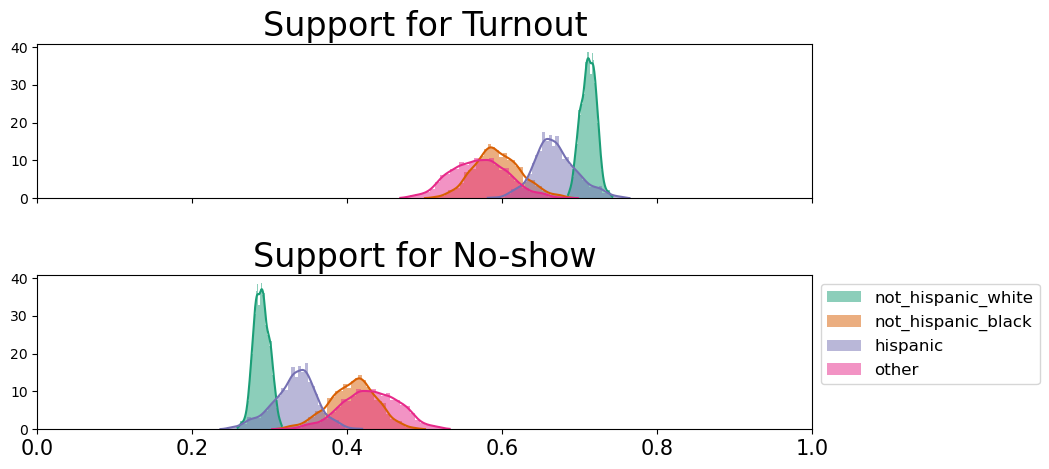

In [102]:
ei_rbyc.plot_kdes(plot_by="candidate") # or, plot_by="group"

array([<Axes: title={'center': 'Support among not_hispanic_white'}>,
       <Axes: title={'center': 'Support among not_hispanic_black'}>,
       <Axes: title={'center': 'Support among hispanic'}, ylabel='Probability Density'>,
       <Axes: title={'center': 'Support among other'}>], dtype=object)

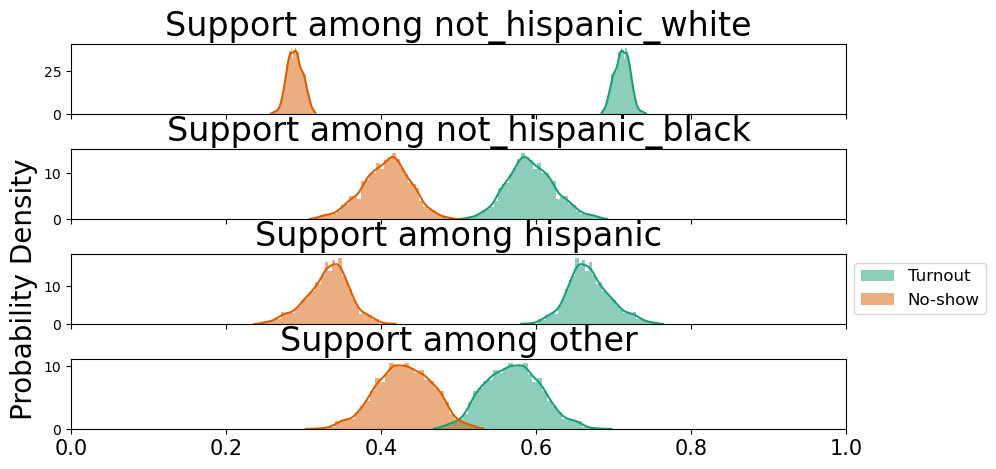

In [103]:
ei_rbyc.plot_kdes(plot_by="group") # or, plot_by="group"

/opt/miniconda3/envs/1347env/lib/python3.12/site-packages/pyei/plot_utils.py:216: UserWarning:

User attempted to plot 51 precinct-level voting preference ridgeplots. Automatically restricting to first 50 precincts (run with `show_all_precincts=True` to plot all precinct ridgeplots.)



<Axes: title={'center': 'Precinct level estimates of voting preferences'}, xlabel='Percent vote for Turnout', ylabel='Precinct'>

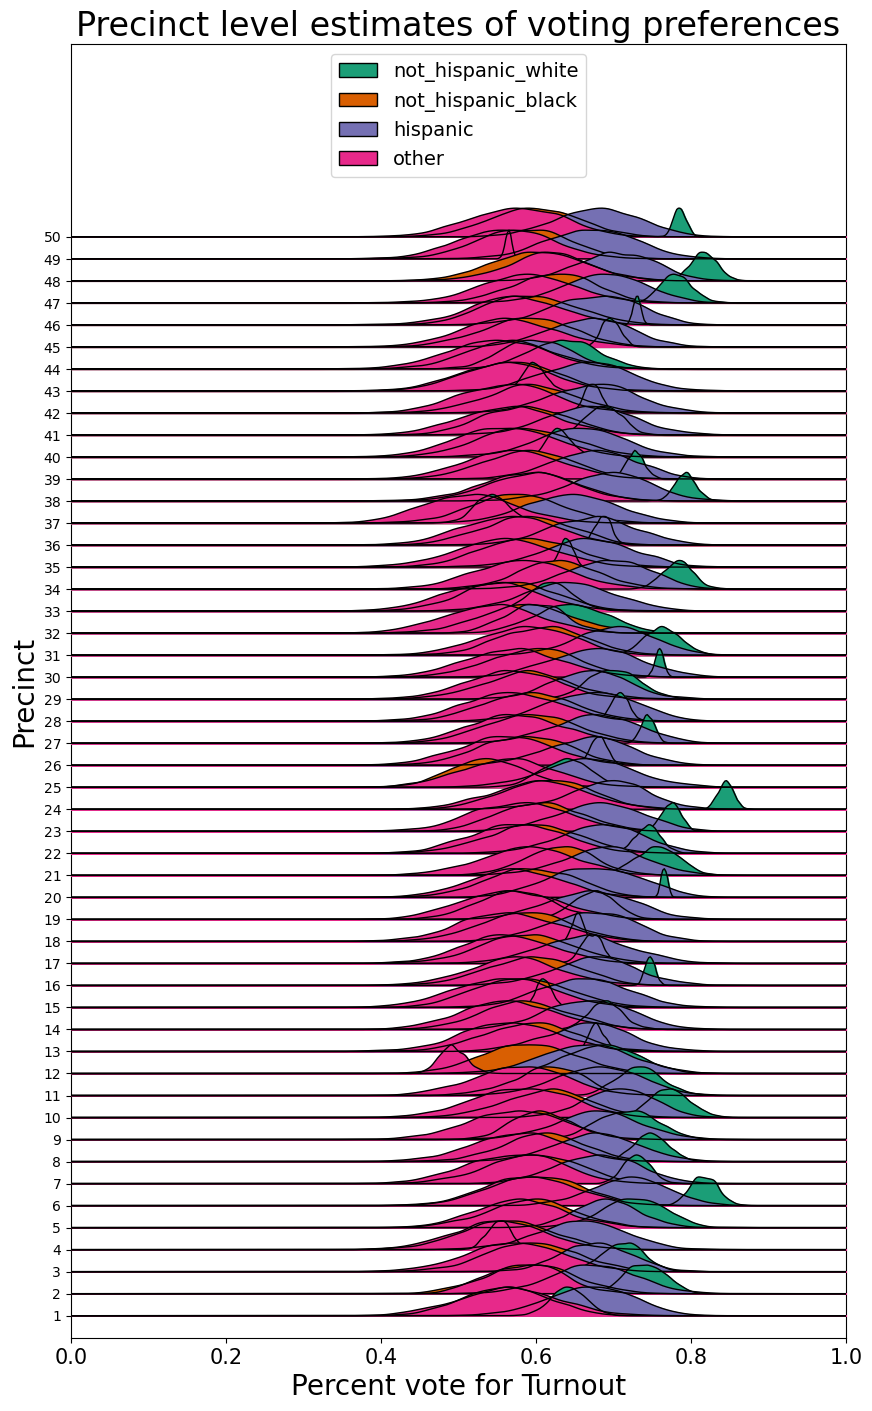

In [104]:
ei_rbyc.precinct_level_plot(candidate="Turnout")

/opt/miniconda3/envs/1347env/lib/python3.12/site-packages/pyei/plot_utils.py:216: UserWarning:

User attempted to plot 51 precinct-level voting preference ridgeplots. Automatically restricting to first 50 precincts (run with `show_all_precincts=True` to plot all precinct ridgeplots.)



<Axes: title={'center': 'Precinct level estimates of voting preferences'}, xlabel='Percent vote for Turnout', ylabel='Precinct'>

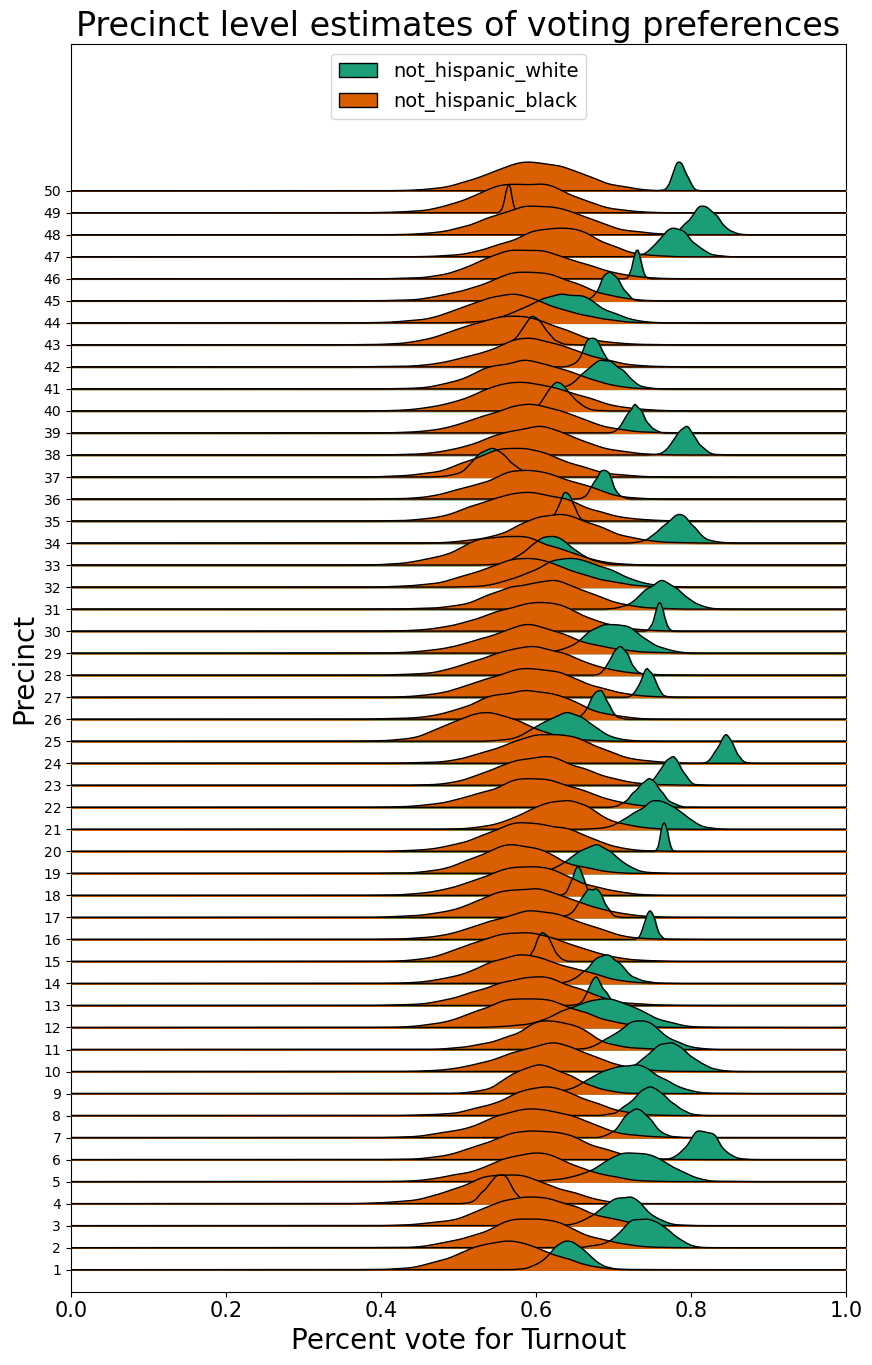

In [105]:
ei_rbyc.precinct_level_plot(candidate="Turnout",groups=["not_hispanic_white","not_hispanic_black"])

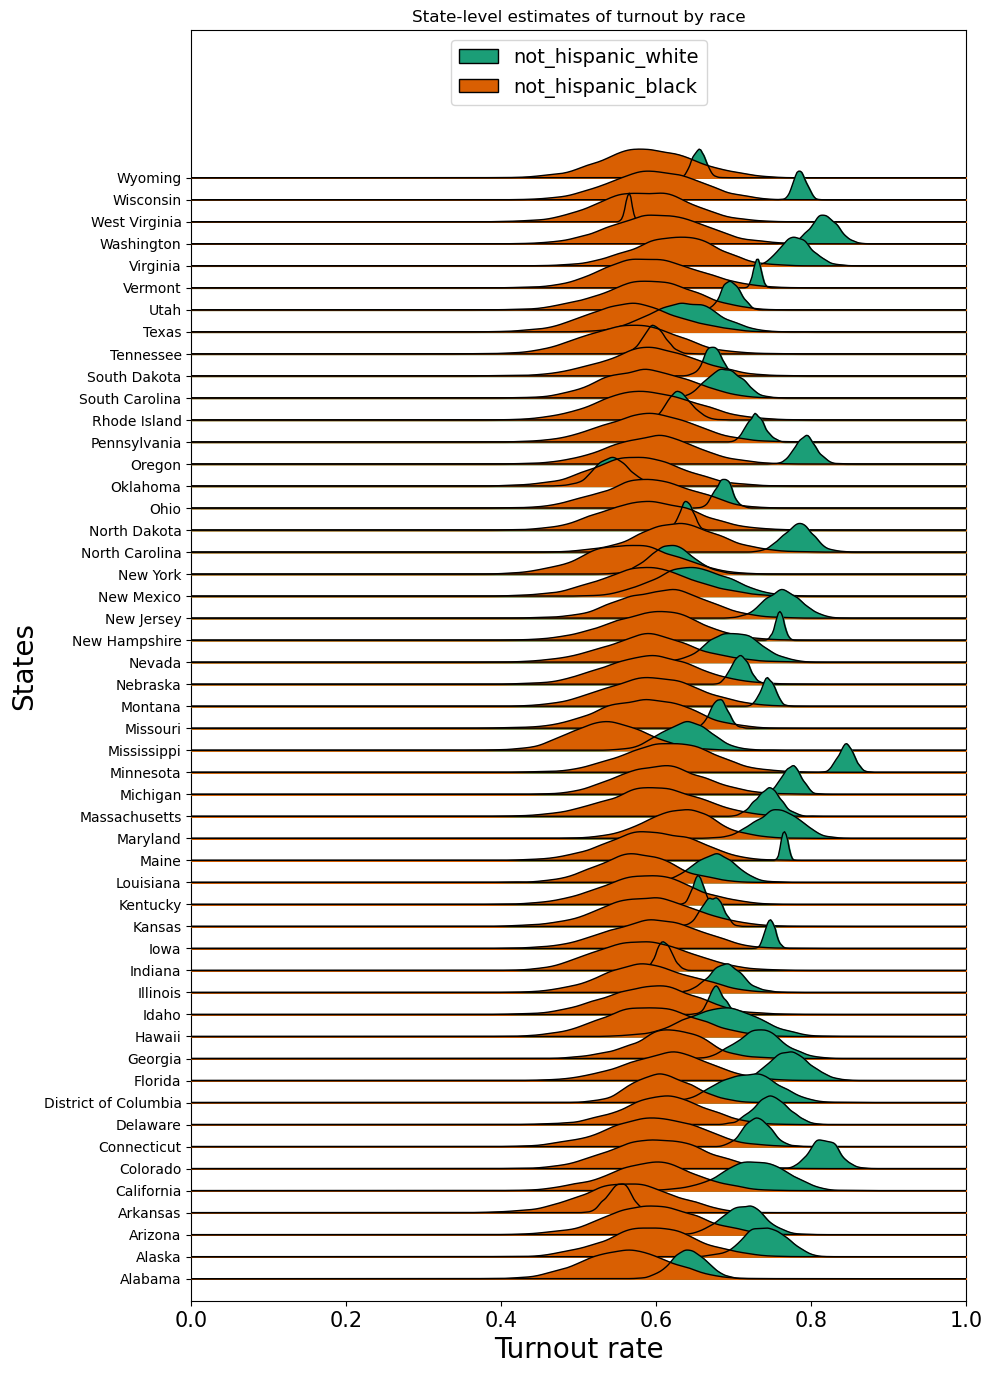

In [127]:
ei_rbyc.precinct_level_plot(candidate="Turnout",groups=["not_hispanic_white","not_hispanic_black"],show_all_precincts=True)
plt.yticks(ticks=range(len(precinct_names)), labels=precinct_names)
plt.ylabel("States")
plt.title("State-level estimates of turnout by race")
plt.xlabel("Turnout rate")
plt.savefig("turnout_estimates.png")

/opt/miniconda3/envs/1347env/lib/python3.12/site-packages/pyei/plot_utils.py:346: UserWarning:

The palette list has more values (8) than needed (4), which may not be intended.

/opt/miniconda3/envs/1347env/lib/python3.12/site-packages/pyei/plot_utils.py:69: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/opt/miniconda3/envs/1347env/lib/python3.12/site-packages/pyei/plot_utils.py:346: UserWarning:

The palette list has more values (8) than needed (4), which may not be intended.

/opt/miniconda3/envs/1347env/lib/python3.12/site-packages/pyei/plot_utils.py:69: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



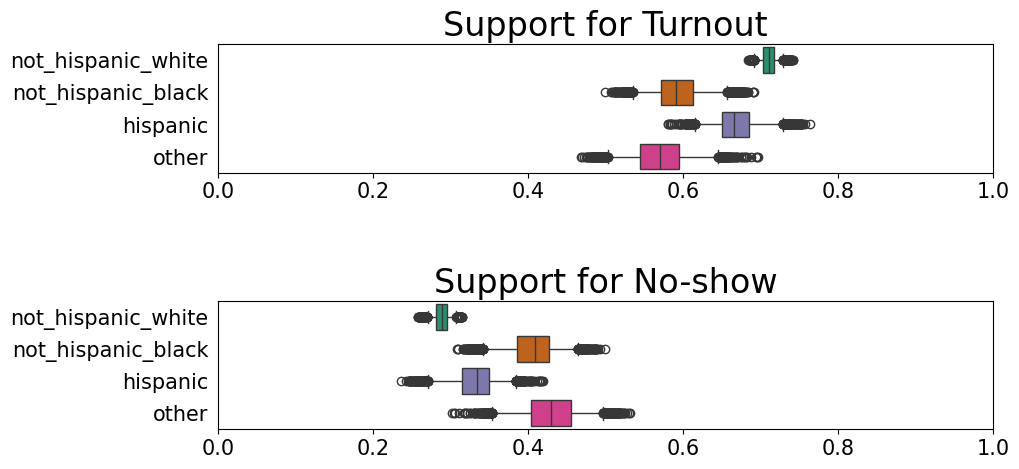

In [106]:
ax = ei_rbyc.plot_boxplots()

In [110]:
ax
# delete second plot
# get the IQR for the first plot
# replot it nicely

<Axes: title={'center': 'Support for No-show'}>

In [107]:
posterior_mean_voting_prefs = ei_rbyc.posterior_mean_voting_prefs
df = pd.DataFrame(posterior_mean_voting_prefs, columns=candidate_names_rbyc, index=demographic_group_names_rbyc)
df.head()

,Turnout,No-show
not_hispanic_white,0.710999,0.289001
not_hispanic_black,0.593351,0.406649
hispanic,0.668345,0.331655
other,0.570467,0.429533


In [108]:
# ground truth
ground_truth[ground_truth['year'] == 2020].T

,2020
Turnout Rate,
not_hispanic_white,72.6%
not_hispanic_black,65.6%
hispanic,52.5%
other,59.8%
year,2020


In [109]:
state_demographics2008 = state_demographics[state_demographics['year'] == 2008]
# sort by state
state_demographics2008 = state_demographics2008.sort_values(by='state')

state_turnout2008 = state_turnout[state_turnout['year'] == 2008]
# sort by state
state_turnout2008 = state_turnout2008.sort_values(by='state')

In [34]:
group_fractions_rbyc_2008 = np.array(state_demographics2008[demographic_group_names_rbyc]).T
votes_fractions_rbyc_2008 = np.vstack((state_turnout2008['vep_highest_office'],1-state_turnout2008['vep_highest_office']))

precinct_pops_2008 = np.array(state_turnout2008['vep']) # This line same as 2x2 example

In [35]:
# Fitting a first r x c model

# Create a RowByColumnEI object
ei_rbyc_2008 = RowByColumnEI(model_name='multinomial-dirichlet-modified', pareto_shape=100, pareto_scale=100)

# Fit the model
ei_rbyc_2008.fit(group_fractions_rbyc_2008, 
       votes_fractions_rbyc_2008, 
       precinct_pops_2008, 
       demographic_group_names=demographic_group_names_rbyc, 
       candidate_names=candidate_names_rbyc, 
       precinct_names=precinct_names, 
)

# Generate a simple report to summarize the results
print(ei_rbyc_2008.summary())

Running ['not_hispanic_white', 'not_hispanic_black', 'hispanic', 'other'] x ['Turnout', 'No-show'] EI
r = 4 rows (demographic groups)
c = 2 columns (candidates or voting outcomes)
number of precincts = 51


  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

/opt/miniconda3/envs/1347env/lib/python3.12/site-packages/jax/_src/interpreters/mlir.py:1101: UserWarning: Some donated buffers were not usable: ShapedArray(float64[4,1000,4,1]), ShapedArray(float64[4,1000,51,4,1]).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



            Computed from the raw b_ samples by multiplying by group populations and then
            getting the proportion of the total pop
            (total pop=summed across all districts):
            The posterior mean for the district-level voting preference of
                not_hispanic_white for Turnout is
                0.675
                95% equal-tailed credible interval:  [0.6575459  0.69223738]
                The posterior mean for the district-level voting preference of
                not_hispanic_white for No-show is
                0.325
                95% equal-tailed credible interval:  [0.30776262 0.3424541 ]
                The posterior mean for the district-level voting preference of
                not_hispanic_black for Turnout is
                0.577
                95% equal-tailed credible interval:  [0.52689699 0.63793085]
                The posterior mean for the district-level voting preference of
                not_hispanic_black for No-sho

/opt/miniconda3/envs/1347env/lib/python3.12/site-packages/pyei/plot_utils.py:346: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.boxplot(data=samples_df, orient="h", whis=[2.5, 97.5], ax=ax, palette=colors)
/opt/miniconda3/envs/1347env/lib/python3.12/site-packages/pyei/plot_utils.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), size=TICKSIZE)
/opt/miniconda3/envs/1347env/lib/python3.12/site-packages/pyei/plot_utils.py:346: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.boxplot(data=samples_df, orient="h", whis=[2.5, 97.5], ax=ax, palette=colors)
/opt/miniconda3/envs/1347env/lib/python3.12/site-packages/pyei/plot_utils.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

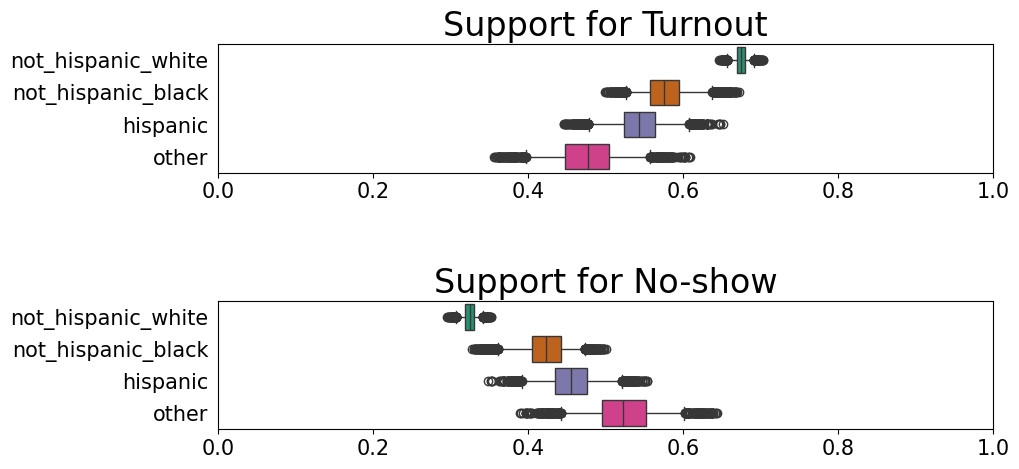

In [36]:
ax = ei_rbyc_2008.plot_boxplots()

In [37]:
posterior_mean_voting_prefs = ei_rbyc_2008.posterior_mean_voting_prefs
df = pd.DataFrame(posterior_mean_voting_prefs, columns=candidate_names_rbyc, index=demographic_group_names_rbyc)
df.head()

,Turnout,No-show
not_hispanic_white,0.675157,0.324843
not_hispanic_black,0.576825,0.423175
hispanic,0.544165,0.455835
other,0.476276,0.523724


In [50]:
# ground truth
ground_truth.iloc[:, ground_truth.columns != 'year'][ground_truth['year'] == 2008].T

,2008
Turnout Rate,
not_hispanic_white,65.2%
not_hispanic_black,69.1%
hispanic,46.5%
other,48.0%


In [ ]:
# ground ground truth


In [86]:
precinct_posterior_means, precinct_credible_intervals = ei_rbyc.precinct_level_estimates()
# Note: precinct_posterior_means has shape num_precincts x r x c
# Note: precinct_credible_intervals has shape num_precincts x r x c x 2 
r = 0
c = 0
print(f'Precinct support for {candidate_names_rbyc[c]} among {demographic_group_names_rbyc[r]}')
print(precinct_posterior_means[:,r,c])
print(f'95% credible intervals of precinct support for {candidate_names_rbyc[c]} among {demographic_group_names_rbyc[r]}')
print(precinct_credible_intervals[:,r,c])

Precinct support for Turnout among not_hispanic_white
[0.64407897 0.74567285 0.72191691 0.55852345 0.73975165 0.82715175
 0.75188141 0.75990557 0.7326749  0.77955989 0.74670921 0.69983908
 0.68835179 0.6942618  0.62053367 0.75280194 0.67256228 0.65982241
 0.68759383 0.7756752  0.77216457 0.75250181 0.78232739 0.85095596
 0.6482473  0.68233481 0.75418249 0.71838429 0.70963227 0.76937715
 0.78525042 0.65899081 0.63241419 0.79198086 0.64429789 0.6944144
 0.54730026 0.80870062 0.73369989 0.63946469 0.69968579 0.68353509
 0.60213331 0.64511408 0.71053847 0.73750139 0.79784789 0.82656652
 0.5700559  0.78921866 0.66002527]
95% credible intervals of precinct support for Turnout among not_hispanic_white
[[0.5987273  0.68884601]
 [0.69069662 0.80259084]
 [0.66933455 0.7755229 ]
 [0.52937221 0.58982879]
 [0.66178724 0.81499207]
 [0.79752174 0.85943621]
 [0.71603569 0.78681648]
 [0.71912251 0.80039473]
 [0.65338372 0.80685929]
 [0.73292864 0.82893419]
 [0.68832375 0.80897252]
 [0.60291293 0.788029

In [129]:
state_white_turnout_esimates = precinct_posterior_means[:,r,c]

NameError: name 'precinct_posterior_means' is not defined

In [26]:
states_dict = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

In [106]:
a = []
for state in states_dict.keys():
    df = whites[whites['sii_state'] == state]
    print(df.shape)
    turnout = 1- (df['svi_vh_2020g'].isna().sum()+df[df['svi_vh_2020g'].isin(['AC', 'AP'])].shape[0]) / df.shape[0]
    a.append(turnout)
print(a)

(5700, 43)
(34299, 43)
(21567, 43)
(46317, 43)
(147658, 43)
(44980, 43)
(25171, 43)
(0, 43)


/var/folders/cp/kz443md17ndf52c8_802gy080000gn/T/ipykernel_59006/2952622785.py:5: RuntimeWarning: invalid value encountered in scalar divide
  turnout = 1- (df['svi_vh_2020g'].isna().sum()+df[df['svi_vh_2020g'].isin(['AC', 'AP'])].shape[0]) / df.shape[0]


(7815, 43)
(134206, 43)
(53852, 43)
(4214, 43)
(27315, 43)
(14426, 43)
(78094, 43)
(53801, 43)
(22544, 43)
(41128, 43)
(25651, 43)
(51108, 43)
(34053, 43)
(14346, 43)
(81134, 43)
(44546, 43)
(49263, 43)
(17575, 43)
(9489, 43)
(65625, 43)
(5485, 43)
(14964, 43)
(12276, 43)
(54446, 43)
(9532, 43)
(18846, 43)
(108246, 43)
(94786, 43)
(28200, 43)
(38255, 43)
(97588, 43)
(8275, 43)
(35656, 43)
(7885, 43)
(49820, 43)
(132850, 43)
(17433, 43)
(57667, 43)
(6302, 43)
(56437, 43)
(75698, 43)
(15841, 43)
(4118, 43)
[0.36701754385964913, 0.5467214787603137, 0.48954421106319845, 0.6090852170909169, 0.6653686220861721, 0.6512672298799467, 0.42167573795240554, nan, 0.5889955214331414, 0.38376823688955786, 0.16463641090395897, 0.086141433317513, 0.28804686069924945, 0.3987938444475253, 0.6043742156887852, 0.24501403319640902, 0.5998491838183109, 0.5242900213966155, 0.5822385092199134, 0.622681380605776, 0.3485155492908114, 0.28907012407639765, 0.27761481006729605, 0.3481345126386207, 0.589874753872074

In [94]:
dx = [state_white_turnout_esimates[i] - a[i] for i in range(len(a))]
dx

[0.27706142890983865,
 0.198951375097155,
 0.23237269686464868,
 -0.05056176875543805,
 0.0743830312782513,
 0.17588451610306888,
 0.33020567055766636,
 nan,
 0.14367937365124095,
 0.3957916534262026,
 0.5820728018650007,
 0.6136976432002215,
 0.4003049262899142,
 0.29546795996455555,
 0.01615945179766254,
 0.5077879090189952,
 0.07271310029599376,
 0.1355323925665367,
 0.10535531658462871,
 0.15299381676987933,
 0.42364901997240256,
 0.4634316812483127,
 0.5047125824082918,
 0.502821447454694,
 0.058372548847847594,
 0.14196496218527654,
 0.10121590110097767,
 0.548098572277589,
 0.06879361530489048,
 0.14247258259488593,
 0.292255956798151,
 0.010954227786235116,
 0.21592237533235215,
 0.20782506859055094,
 0.04833129455339902,
 0.12229404293682156,
 0.10013713833231275,
 0.18888621303480901,
 0.12439341289619288,
 0.03366408083900241,
 0.12606564266556164,
 0.3861349593374569,
 0.10681014329791316,
 0.1221031634069566,
 0.20941990573540115,
 0.46243939652004185,
 0.19010431505618997

In [91]:
state_white_turnout_esimates

array([0.64407897, 0.74567285, 0.72191691, 0.55852345, 0.73975165,
       0.82715175, 0.75188141, 0.75990557, 0.7326749 , 0.77955989,
       0.74670921, 0.69983908, 0.68835179, 0.6942618 , 0.62053367,
       0.75280194, 0.67256228, 0.65982241, 0.68759383, 0.7756752 ,
       0.77216457, 0.75250181, 0.78232739, 0.85095596, 0.6482473 ,
       0.68233481, 0.75418249, 0.71838429, 0.70963227, 0.76937715,
       0.78525042, 0.65899081, 0.63241419, 0.79198086, 0.64429789,
       0.6944144 , 0.54730026, 0.80870062, 0.73369989, 0.63946469,
       0.69968579, 0.68353509, 0.60213331, 0.64511408, 0.71053847,
       0.73750139, 0.79784789, 0.82656652, 0.5700559 , 0.78921866,
       0.66002527])

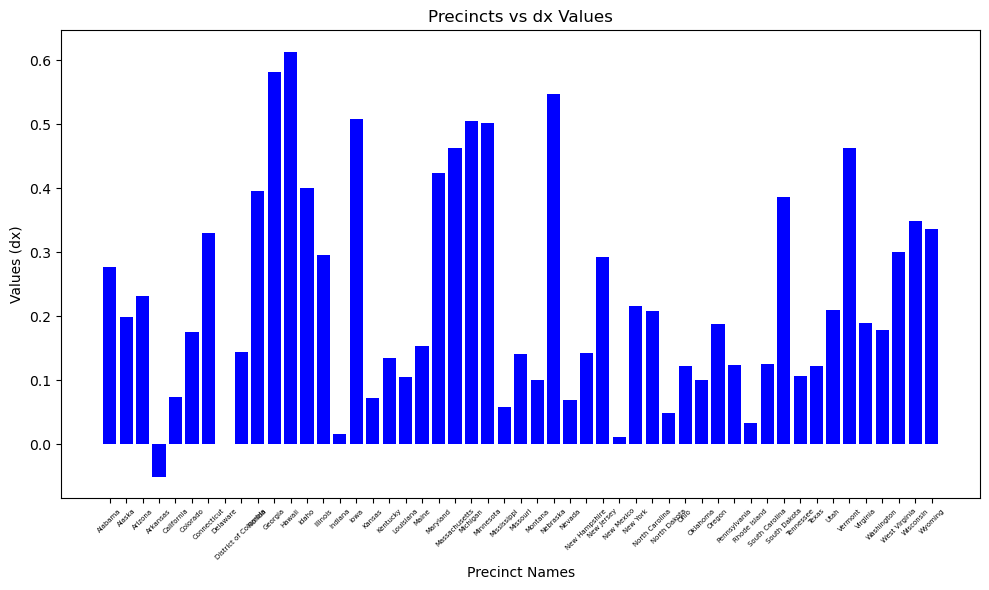

In [98]:
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(precinct_names, dx, color='blue')  # 'color' is optional, you can customize it

# Adding titles and labels
plt.xlabel('Precinct Names')
plt.ylabel('Values (dx)')
plt.title('Precincts vs dx Values')
plt.xticks(rotation=45, fontsize=5)  # Rotate x-axis labels if they are long

# Display the chart
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [111]:
a = []
for state in states_dict.keys():
    df = whites[whites['sii_state'] == state]
    if df.shape[0] == 0:
        a.append(0)
        continue
    turnout = 1- (df[df['svi_vh_2020g'].isin(['AC', 'AP'])].shape[0]) / df.shape[0]
    a.append(turnout)
print(a)

[0.7871929824561403, 0.9782500947549492, 0.9461677562943386, 0.9802016538204115, 0.9894147286296713, 0.9726767452200978, 0.7876921854515117, 0, 0.9699296225207934, 0.7487891748506028, 0.5736834286563173, 0.49976269577598487, 0.6498993227164562, 0.7462220989879385, 0.9805618869567444, 0.6816601921897363, 0.9892654364797729, 0.9789680995915192, 0.9912673969825738, 0.98452297096345, 0.7134173200599065, 0.6405269761606023, 0.6642221510094412, 0.658061329861267, 0.9899518908714451, 0.9911237553342817, 0.9865106965960586, 0.5091961904761905, 0.9874202370100273, 0.9887062282812082, 0.7969208211143695, 0.9858575469272306, 0.7872429710449014, 0.9862039690119919, 0.9822995768896772, 0.9885109615344038, 0.9073404255319149, 0.9866945497320612, 0.9578431774398491, 0.9784894259818732, 0.9574545658514696, 0.7340519974635384, 0.9435166599759133, 0.9414301844185171, 0.8643377502437906, 0.6290946295108121, 0.9744525547445255, 0.9869766288073427, 0.6404792729002087, 0.8980493655703554, 0.7277804759592035

In [112]:
dx = [state_white_turnout_esimates[i] - a[i] for i in range(len(a))]
dx

[-0.14311400968665255,
 -0.23257724089748044,
 -0.22425084836649145,
 -0.4216782054849326,
 -0.2496630752652479,
 -0.1455249992370823,
 -0.03581077694143975,
 0.7599055728542939,
 -0.23725472743641107,
 0.03077071546515764,
 0.17302578411264236,
 0.2000763807417496,
 0.03845246427270743,
 -0.0519602945758576,
 -0.3600282194702966,
 0.07114175002566792,
 -0.3167031523654683,
 -0.319145685628367,
 -0.30367357117803173,
 -0.2088477735877946,
 0.05874724920330743,
 0.11197482916410806,
 0.11810524146614665,
 0.19289463023204778,
 -0.34170458815152316,
 -0.3087889496212669,
 -0.2323282025980422,
 0.20918809608711275,
 -0.27778797083913864,
 -0.2193290747159935,
 -0.011670403579822297,
 -0.326866732431228,
 -0.1548287786752014,
 -0.1942231113945918,
 -0.33800168772770134,
 -0.2940965632708462,
 -0.36004016663222627,
 -0.17799393335128433,
 -0.22414329243642994,
 -0.3390247409132635,
 -0.2577687751042387,
 -0.050516911302999734,
 -0.3413833532898026,
 -0.2963161064462613,
 -0.1537992762757272

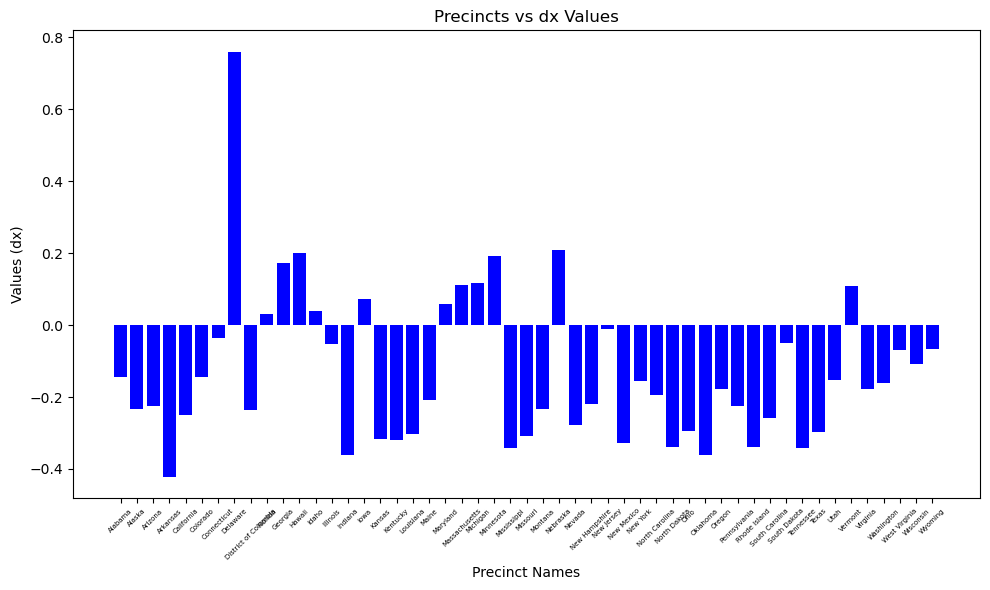

In [113]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(precinct_names, dx, color='blue')  # 'color' is optional, you can customize it

# Adding titles and labels
plt.xlabel('Precinct Names')
plt.ylabel('Values (dx)')
plt.title('Precincts vs dx Values')
plt.xticks(rotation=45, fontsize=5)  # Rotate x-axis labels if they are long

# Display the chart
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

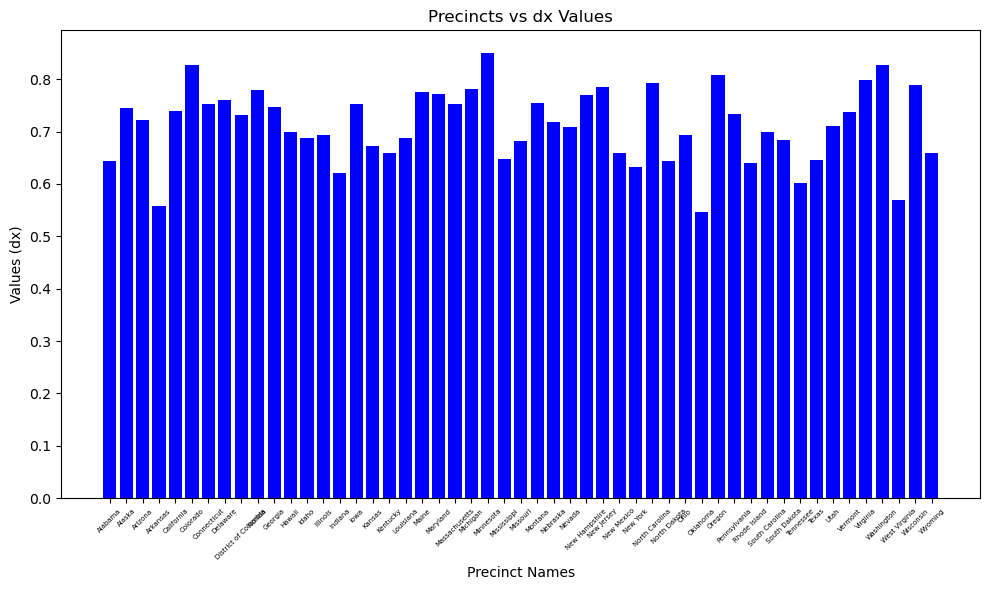

In [114]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(precinct_names, state_white_turnout_esimates, color='blue')  # 'color' is optional, you can customize it

# Adding titles and labels
plt.xlabel('Precinct Names')
plt.ylabel('Values (dx)')
plt.title('Precincts vs dx Values')
plt.xticks(rotation=45, fontsize=5)  # Rotate x-axis labels if they are long

# Display the chart
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [116]:
ground_truth

2020    65.6%
2016    59.9%
2012    67.4%
2008    69.1%
2004    61.4%
2000    52.9%
1996    48.1%
1992    50.6%
1988    46.8%
Name: not_hispanic_black, dtype: object

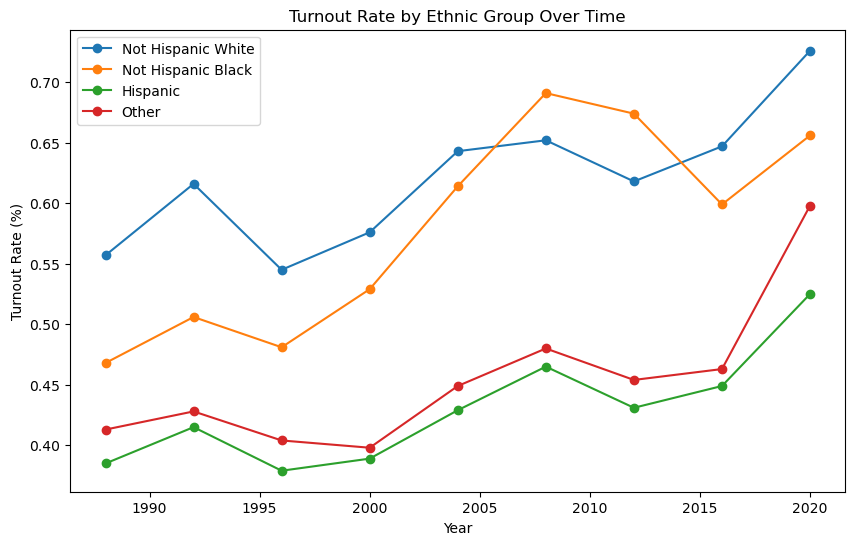

In [124]:
plt.figure(figsize=(10, 6))
years = ground_truth['year'].astype(int)
# Plotting each line
plt.plot(years, ground_truth['not_hispanic_white'].replace({'%':''},regex=True).astype(float)/100, label='Not Hispanic White', marker='o')
plt.plot(years, ground_truth['not_hispanic_black'].replace({'%':''},regex=True).astype(float)/100, label='Not Hispanic Black', marker='o')
plt.plot(years, ground_truth['hispanic'].replace({'%':''},regex=True).astype(float)/100, label='Hispanic', marker='o')
plt.plot(years, ground_truth['other'].replace({'%':''},regex=True).astype(float)/100, label='Other', marker='o')

# Adding titles and labels
plt.title("Turnout Rate by Ethnic Group Over Time")
plt.xlabel("Year")
plt.ylabel("Turnout Rate (%)")

# Displaying the legend
plt.legend()

# save
plt.savefig('census_turnout.png')

# Display the plot
plt.show()

In [125]:
# find which state has least NA
a = []
for state in states_dict.keys():
    df = voterfile_complete[voterfile_complete['sii_state'] == state]
    if df.shape[0] == 0:
        a.append(0)
        continue
    na_rate = 1- (df[df['svi_vh_2020g'].isna()].shape[0]) / df.shape[0]
    a.append(na_rate)
print(a)

[0.542466922748613, 0.5369555564525895, 0.5112734319680989, 0.5711424062158552, 0.5881894873458793, 0.633298395835924, 0.5813939375549959, 0, 0.5758115969224995, 0.5905707081648928, 0.5354141423932535, 0.5606006435466571, 0.617397739504844, 0.6362654811051127, 0.5699052759697306, 0.5352213118651051, 0.5779646252319812, 0.52939357119187, 0.5510243385733888, 0.5945339873861247, 0.585576017130621, 0.6379656928437416, 0.5826096471594696, 0.6626606048626211, 0.5748538316070716, 0.519307775340367, 0.6524152707440591, 0.6200538331565091, 0.632303559435863, 0.6058837401249852, 0.6819543673657524, 0.6017693853526285, 0.5489168985649588, 0.5303282508822158, 0.5539509601745122, 0.5557521966489987, 0.5066686080372743, 0.6056868169244025, 0.6196541238112085, 0.5870568594716685, 0.5879773216649217, 0.5450286918842956, 0.5359969616407141, 0.4866402283263427, 0.597095027080256, 0.6070341103810452, 0.6256082725060828, 0.6182443076041816, 0.6085390525417188, 0.5327400637363959, 0.5741478530323152]


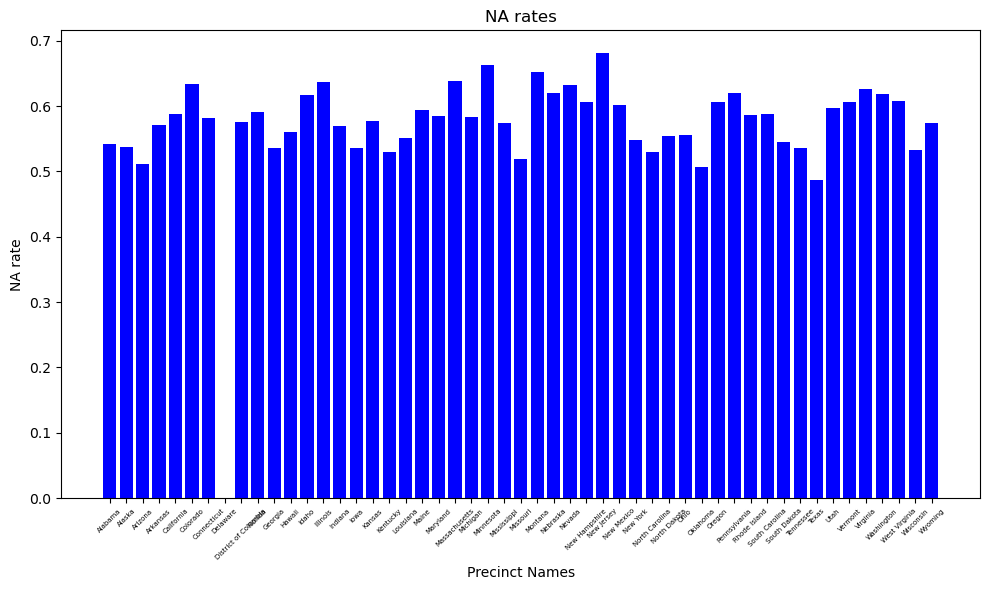

In [127]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(precinct_names, a, color='blue')  # 'color' is optional, you can customize it

# Adding titles and labels
plt.xlabel('Precinct Names')
plt.ylabel('NA rate')
plt.title('NA rates')
plt.xticks(rotation=45, fontsize=5)  # Rotate x-axis labels if they are long

# Display the chart
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [129]:
whites.columns

Index(['sii_state', 'sii_deceased', 'sii_age', 'sii_age_range', 'sii_gender',
       'sii_race', 'svi_party_registration', 'sii_education_level',
       'sii_homeowner', 'sii_married', 'sii_urbanicity', 'svi_vh_2020p',
       'svi_vh_2020p_party', 'svi_vh_2020pp', 'svi_vh_2020pp_party',
       'svi_vh_2020g', 'svi_vh_2021p', 'svi_vh_2021p_party', 'svi_vh_2021g',
       'svi_vh_2022p', 'svi_vh_2022p_party', 'svi_vh_2022g', 'svi_vh_2023p',
       'svi_vh_2023p_party', 'svi_vh_2023g', 'svi_vh_2024p',
       'svi_vh_2024p_party', 'svi_vh_2024pp', 'svi_vh_2024pp_party',
       'svi_vh_2024g', 'svi_vote_all_general', 'svi_vote_all_general_fed',
       'svi_vote_all_general_fed_pct', 'svi_vote_all_general_midterm',
       'svi_vote_all_general_midterm_pct', 'svi_vote_all_general_pres',
       'svi_vote_all_general_pres_pct', 'svi_vote_all_offyear',
       'svi_vote_all_primary', 'svi_vote_all_primary_pres',
       'svi_vote_all_primary_pres_pct', 'svi_vote_all_primary_dem_votes',
       'svi_

In [144]:
# find which state has least NA
white_na = whites['svi_vh_2020g'].isna().sum() / whites.shape[0]
white_absent = whites[whites['svi_vh_2020g'].isin(['AC','AP'])].shape[0] / whites.shape[0]
white_turnout = 1 - white_na - white_absent

black_na = blacks['svi_vh_2020g'].isna().sum() / blacks.shape[0]
black_absent = blacks[blacks['svi_vh_2020g'].isin(['AC','AP'])].shape[0] / blacks.shape[0]
black_turnout = 1 - black_na - black_absent

hispanic_na = hispanics['svi_vh_2020g'].isna().sum() / hispanics.shape[0]
hispanic_absent = hispanics[hispanics['svi_vh_2020g'].isin(['AC','AP'])].shape[0] / hispanics.shape[0]
hispanic_turnout = 1 - hispanic_na - hispanic_absent

other_na = others['svi_vh_2020g'].isna().sum() / others.shape[0]
other_absent = others[others['svi_vh_2020g'].isin(['AC','AP'])].shape[0] / others.shape[0]
other_turnout = 1 - other_na - other_absent

In [149]:
white_turnout_2020_cb = ground_truth[ground_truth['year']==2020]['not_hispanic_white'].replace({'%':''},regex=True).astype(float)/100
black_turnout_2020_cb = ground_truth[ground_truth['year']==2020]['not_hispanic_black'].replace({'%':''},regex=True).astype(float)/100
hispanic_turnout_2020_cb = ground_truth[ground_truth['year']==2020]['hispanic'].replace({'%':''},regex=True).astype(float)/100
other_turnout_2020_cb = ground_truth[ground_truth['year']==2020]['other'].replace({'%':''},regex=True).astype(float)/100

/opt/miniconda3/envs/1347env/lib/python3.12/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


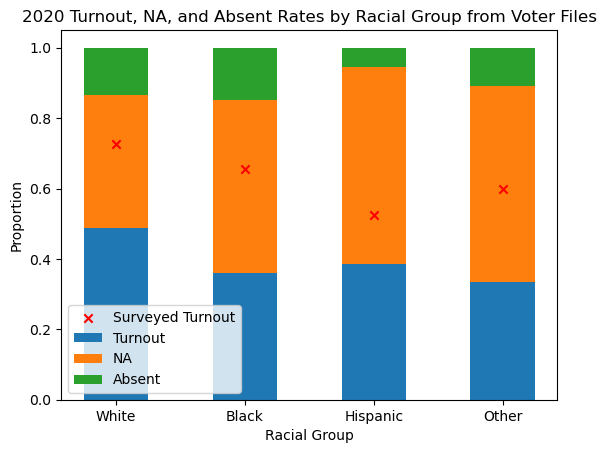

In [152]:
# Assuming you already have the values for NA, absent, and turnout for each racial group
racial_groups = ['White', 'Black', 'Hispanic', 'Other']
turnout_rates = [white_turnout, black_turnout, hispanic_turnout, other_turnout]
na_rates = [white_na, black_na, hispanic_na, other_na]
absent_rates = [white_absent, black_absent, hispanic_absent, other_absent]

surveyed = [white_turnout_2020_cb, black_turnout_2020_cb, hispanic_turnout_2020_cb, other_turnout_2020_cb]

# Setting up the plot
fig, ax = plt.subplots()

# Stacked bar chart
bar_width = 0.5
index = np.arange(len(racial_groups))

# Plotting each category
p1 = ax.bar(index, turnout_rates, bar_width, label='Turnout')
p2 = ax.bar(index, na_rates, bar_width, bottom=turnout_rates, label='NA')
p3 = ax.bar(index, absent_rates, bar_width, bottom=np.array(turnout_rates) + np.array(na_rates), label='Absent')

# Plot the surveyed data as points on the bars
ax.scatter(index, surveyed, color='red', label='Surveyed Turnout', zorder=5, marker="x")


# Labeling the chart
ax.set_xlabel('Racial Group')
ax.set_ylabel('Proportion')
ax.set_title('2020 Turnout, NA, and Absent Rates by Racial Group from Voter Files')
ax.set_xticks(index)
ax.set_xticklabels(racial_groups)
ax.legend()

plt.savefig('voterfile_turnout.png')
# Display the plot
plt.show()

In [22]:
state_demographics2020.columns

Index(['not_hispanic_white', 'not_hispanic_black', 'hispanic', 'other', 'year',
       'state'],
      dtype='object')

In [27]:
get_abr = dict()
for k,v in states_dict.items():
    get_abr[v] = k

In [28]:
# state_demographics2020['state'] = [get_abr[x] for x in state_demographics2020['state']]

In [40]:
state_demographics2020.isna().sum()

not_hispanic_white    0
not_hispanic_black    0
hispanic              0
other                 0
year                  0
state                 0
dtype: int64

In [48]:
pd.Series([0] * len(states))

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
dtype: int64

In [53]:

len(pd.Series([0] * len(states)).astype(float))

51

In [52]:

len(state_demographics2020['other'].astype(float))

51

In [67]:
state_demographics2020 = state_demographics2020.reset_index()
state_demographics2020

,level_0,index,not_hispanic_white,not_hispanic_black,hispanic,other,year,state
0,0,612,0.631205,0.256387,0.052554,0.059854,2020,Alabama
1,1,613,0.575079,0.028267,0.067936,0.328717,2020,Alaska
2,2,614,0.533671,0.044349,0.306544,0.115436,2020,Arizona
3,3,615,0.685218,0.149387,0.085288,0.080107,2020,Arkansas
4,4,616,0.346869,0.053601,0.394040,0.205490,2020,California
5,5,617,0.651342,0.038331,0.218818,0.091510,2020,Colorado
6,6,618,0.632076,0.100095,0.172852,0.094977,2020,Connecticut
7,7,619,0.585739,0.215122,0.105349,0.093790,2020,Delaware
8,8,620,0.379629,0.409061,0.112613,0.098697,2020,District of Columbia
9,9,621,0.515387,0.145186,0.264518,0.074908,2020,Florida


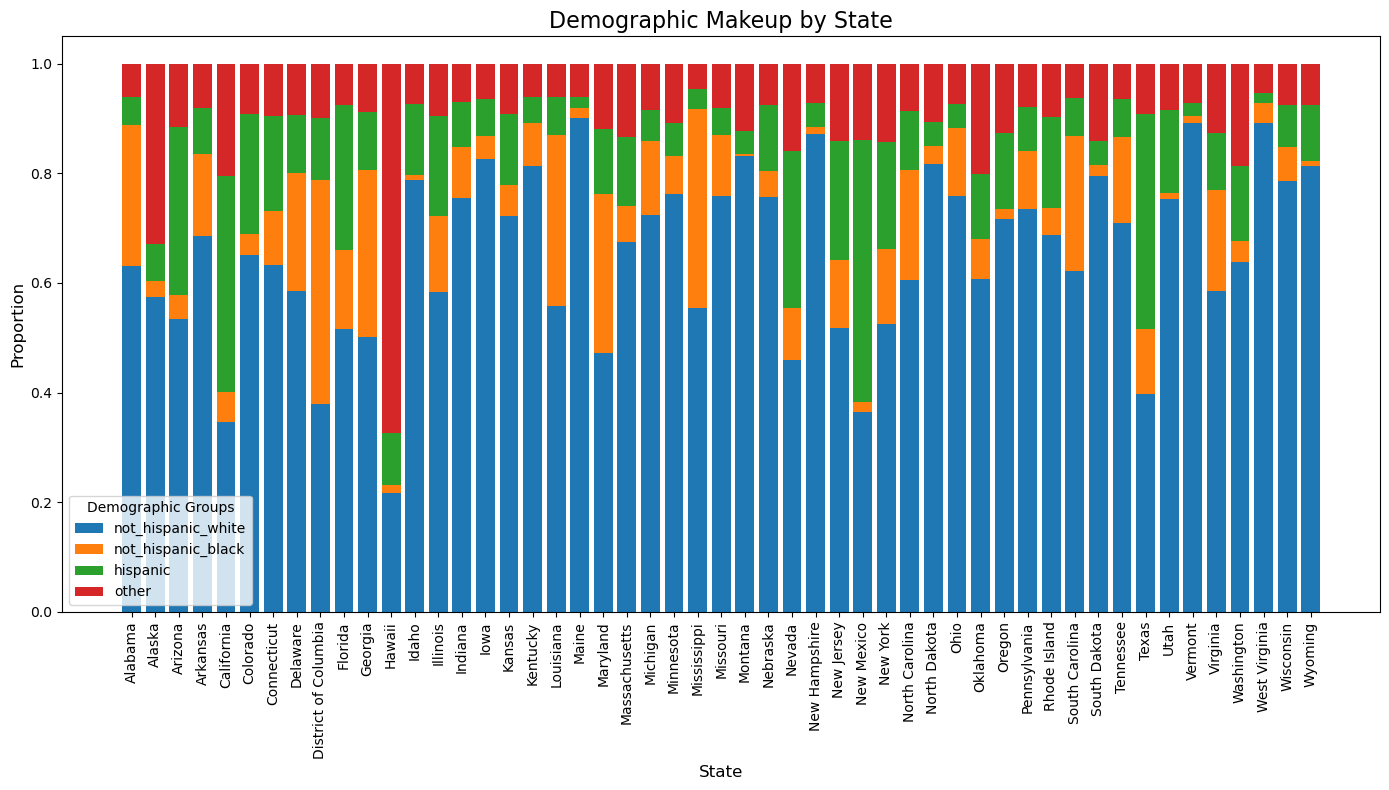

In [78]:
import matplotlib.pyplot as plt

# Assuming you have the dataframe `state_demographics2020` already loaded

# Set the figure size for better readability
plt.figure(figsize=(14, 8))

# Set the x-axis (states) and y-axis (stacked demographic makeup)
states = state_demographics2020['state']  # The states on the x-axis
demographic_columns = ['not_hispanic_white', 'not_hispanic_black', 'hispanic', 'other']  # Columns to stack

# Plot the stacked bar chart
bottom_stack = pd.Series([0] * len(states)).astype(float)  # To hold the cumulative heights for stacking

# Plot each demographic as a part of the stack
for col in demographic_columns:
    plt.bar(states, state_demographics2020[col].astype(float), bottom=bottom_stack, label=col)
    assert(bottom_stack.shape[0] == state_demographics2020[col].shape[0])
    bottom_stack += state_demographics2020[col]

# Add labels and title
plt.title('Demographic Makeup by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Proportion', fontsize=12)

# Add a legend to indicate which color corresponds to each demographic group
plt.legend(title='Demographic Groups')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.savefig("state_demographics.png")
plt.show()

In [71]:
state_turnout2020.columns

Index(['year', 'state', 'vep_turnout', 'vep_highest_office',
       'vap_highest_office', 'total_ballots', 'highest_office_ballots', 'vep',
       'vap', 'noncitizen', 'prison', 'probation', 'parole',
       'total_ineligible', 'overseas_eligible'],
      dtype='object')

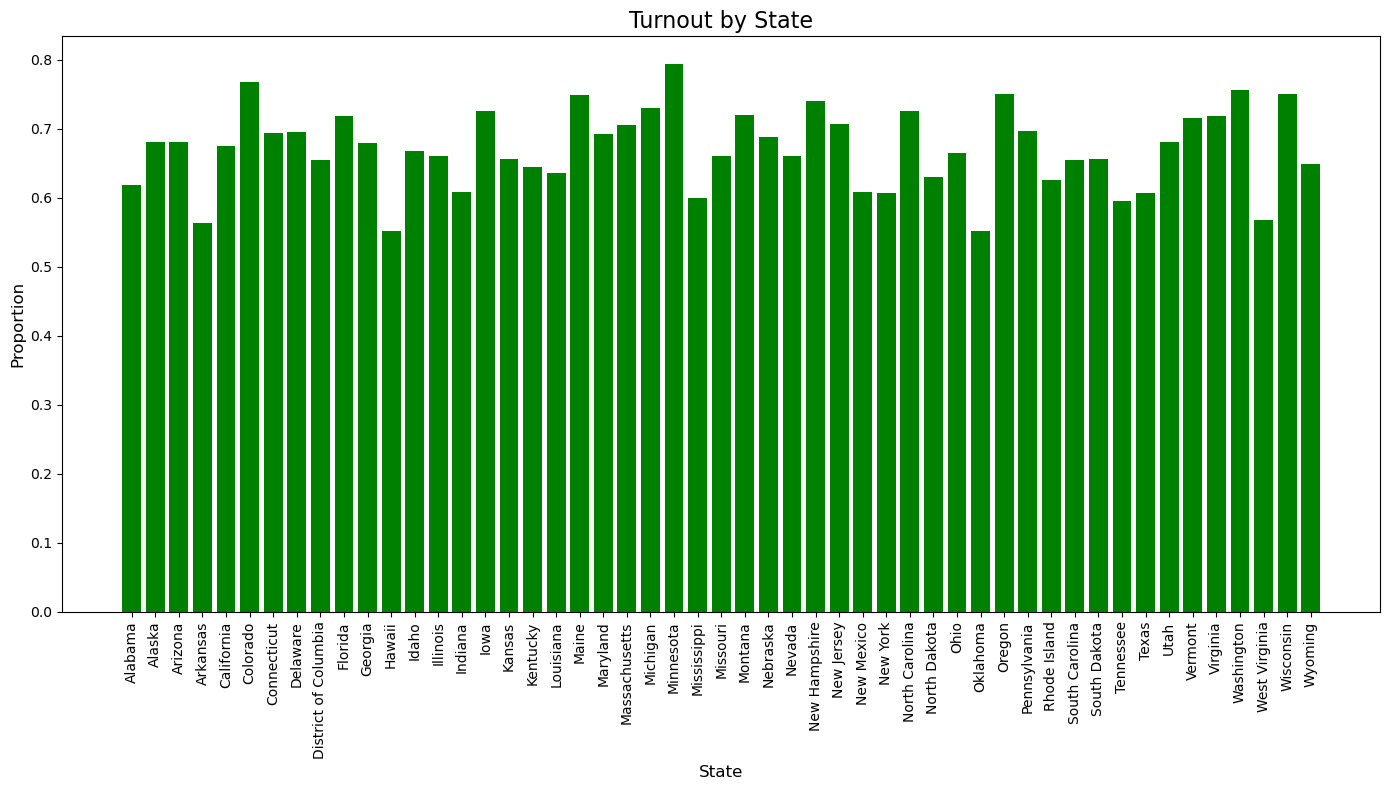

In [77]:
import matplotlib.pyplot as plt

# Assuming you have the dataframe `state_demographics2020` already loaded

# Set the figure size for better readability
plt.figure(figsize=(14, 8))

# Set the x-axis (states) and y-axis (stacked demographic makeup)
states = state_demographics2020['state']  # The states on the x-axis

plt.bar(states, state_turnout2020['vep_highest_office'].astype(float), label=col, color="green")

# Add labels and title
plt.title('Turnout by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Proportion', fontsize=12)


# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.savefig("state_turnout.png")
plt.show()

In [150]:
white_turnout_vf = []
for state in states_dict.keys():
    df = whites[whites['sii_state'] == state]
    if df.shape[0] == 0:
        white_turnout_vf.append(0)
        continue
    turnout = 1- (df[df['svi_vh_2020g'].isin(['AC', 'AP'])].shape[0]) / df.shape[0]
    white_turnout_vf.append(turnout)

In [146]:
reversed_precinct_names = precinct_names[::-1]

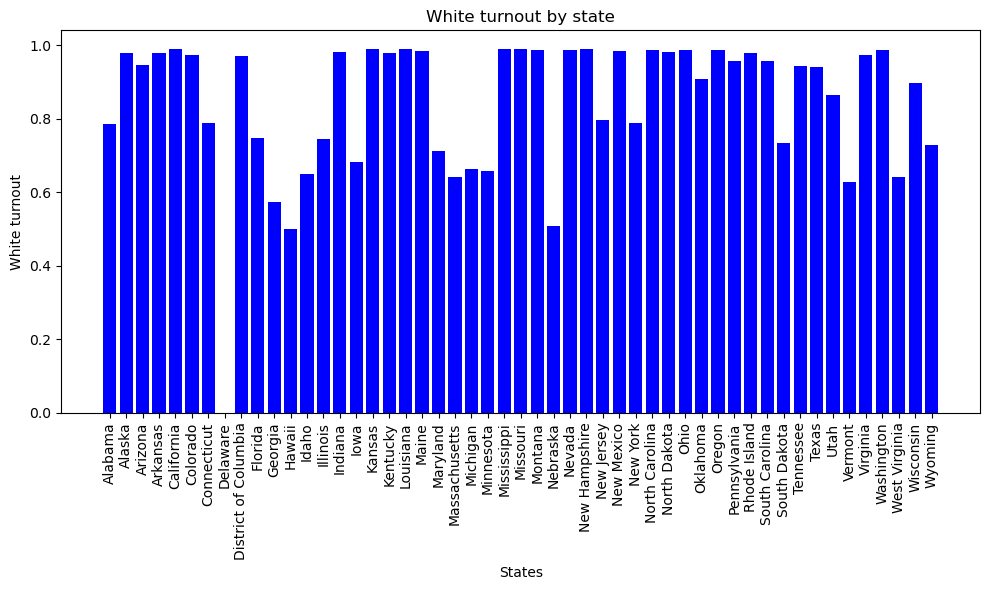

In [151]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(precinct_names, white_turnout_vf, color='blue')  # 'color' is optional, you can customize it

# Adding titles and labels
plt.xlabel('States')
plt.ylabel('White turnout')
plt.title('White turnout by state')
plt.xticks(rotation=90)  # Rotate x-axis labels if they are long

# Display the chart
plt.tight_layout()  # Adjust layout for better spacing
plt.show()